In [1]:
# Importing our dependencies
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn as skl
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_regression


#  Import the Baseball csv to show data
import pandas as pd
baseball_df = pd.read_csv("Resources/Batting_Salary.csv")
baseball_df.head()


# This is what we'd do to pull it from the database once that is created
#     import sqlite3
# creating the connection
#    bball = sqlite3.connect('Baseball_Salaries.db')
# read data from SQL to our pandas dataframe that we will use throughout this model.
#   baseball_df = pd.read_sql_query('Select * from Baseball_Salaries;', bball)

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [2]:
#check out the data in our table
baseball_df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [3]:
#exploring the values in the specific columns
baseball_df.nunique()

player_id    1645
year            6
stint           2
team_id        31
league_id       2
g             162
ab            649
r             121
h             211
double         56
triple         17
hr             50
rbi           131
sb             55
cs             21
bb            114
so            190
ibb            30
hbp            26
sh             21
sf             13
g_idp          32
salary       1224
dtype: int64

In [4]:
#reviewing the years included in the dataset

baseball_df.year.value_counts()

2011    812
2012    811
2013    809
2014    796
2010    790
2009    787
Name: year, dtype: int64

<AxesSubplot:xlabel='h', ylabel='salary'>

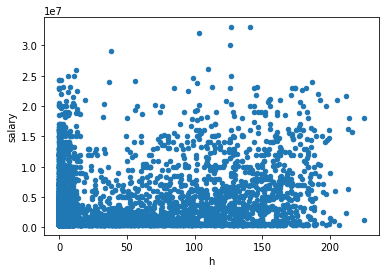

In [5]:
#plotting the hits vs. salary to gain an understanding of the data
baseball_df.plot.scatter('h','salary')

<AxesSubplot:>

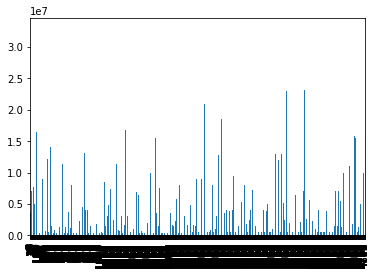

In [6]:
#plotting salary vs player
baseball_df.salary.plot.bar()

In [7]:
#drop columns with insignificant values
# Drop the non-beneficial ID columns, player_id and league_id.
baseball_df = baseball_df.drop(columns=['player_id','league_id'])
baseball_df.head()


,year,stint,team_id,g,ab,r,h,double,triple,hr,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,1,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,1,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,1,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,1,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,1,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [8]:
#check datatypes of each column
baseball_df.dtypes

year         int64
stint        int64
team_id     object
g            int64
ab         float64
r          float64
h          float64
double     float64
triple     float64
hr         float64
rbi        float64
sb         float64
cs         float64
bb         float64
so         float64
ibb        float64
hbp        float64
sh         float64
sf         float64
g_idp      float64
salary       int64
dtype: object

In [9]:
# Verify there are no null values
baseball_df.isnull().values.any()

False

In [10]:
# Get description of each column. Set view to view all columns.
pd.set_option("display.max_columns", None)
baseball_df.describe(include="all")

,year,stint,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
count,4805.000000,4805.000000,4805,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.00000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4.805000e+03
unique,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.510510,1.002497,NaN,68.906764,174.472216,22.333195,45.009781,8.944225,0.89948,5.090323,21.459105,3.122997,1.170239,16.294693,36.602081,1.255567,1.675338,1.498439,1.375650,3.913840,3.544561e+06
std,1.700805,0.049917,NaN,47.091038,207.126452,29.610346,57.386529,11.920995,1.82945,8.367232,29.364910,7.182820,2.344708,22.540484,43.330539,2.896140,2.934532,2.720510,2.128909,5.531951,4.739865e+06
min,2009.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
25%,2010.000000,1.000000,NaN,31.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05
50%,2012.000000,1.000000,NaN,60.000000,60.000000,4.000000,10.000000,2.000000,0.00000,0.000000,4.000000,0.000000,0.000000,3.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000e+06
75%,2013.000000,1.000000,NaN,107.000000,336.000000,41.000000,85.000000,16.000000,1.00000,7.000000,37.000000,3.000000,1.000000,28.000000,63.000000,1.000000,2.000000,2.000000,2.000000,6.000000,4.800000e+06


In [11]:
# Check stint values as players have multiple stints would be equivalent to duplicates.
baseball_df.stint.value_counts()

1    4793
2      12
Name: stint, dtype: int64

In [12]:
# Drop the 2nd stint values.
baseball_df = baseball_df[baseball_df.stint == 1]

In [13]:
# Drop stint column.
baseball_df = baseball_df.drop(columns=["stint"])
baseball_df.head()

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [14]:
# Get updated description of each column.
baseball_df.describe(include="all")

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
count,4793.000000,4793,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.00000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4.793000e+03
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.504277,NaN,69.017317,174.730023,22.372209,45.082620,8.960776,0.901314,5.101398,21.499061,3.122470,1.171083,16.320885,36.64323,1.258502,1.678489,1.497809,1.377843,3.920926,3.541924e+06
std,1.698359,NaN,47.088875,207.287199,29.634741,57.431681,11.930347,1.831276,8.374487,29.388446,7.186595,2.346263,22.559190,43.36633,2.899136,2.936997,2.721806,2.130583,5.536362,4.739080e+06
min,2009.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
25%,2010.000000,NaN,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05
50%,2012.000000,NaN,61.000000,60.000000,4.000000,10.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,19.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000e+06
75%,2013.000000,NaN,107.000000,336.000000,41.000000,85.000000,16.000000,1.000000,7.000000,38.000000,3.000000,1.000000,28.000000,63.00000,1.000000,2.000000,2.000000,2.000000,7.000000,4.775000e+06


In [15]:
# Created single column. Hit-double-triple-homerun = single
baseball_df["single"] = baseball_df["h"] - baseball_df["double"] - baseball_df["triple"] - baseball_df["hr"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0


In [16]:
# Created slugging percentage. Slg % = (single +2*double + 3*triple + 4*home run) / at-bat
baseball_df["slg %"] = (baseball_df["single"] + 2*baseball_df["double"] + 3*baseball_df["triple"] + 4*baseball_df["hr"]) / baseball_df["ab"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737


In [17]:
# Created on-base percentage (obp) = (h + bb + hbp) / (ab + bb + hbp + sf)
baseball_df["obp"] = (
    baseball_df["h"] + baseball_df["bb"] + baseball_df["hbp"]) / (baseball_df["ab"] + baseball_df["bb"] + baseball_df["hbp"] + baseball_df["sf"])
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN,NaN
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN,NaN
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN,NaN
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294


In [18]:
# Created batting avg = h / ab
baseball_df["batting avg"] = baseball_df["h"] / baseball_df["ab"]

In [19]:
# Create on base percentage plus slugging (ops) = obp + slg
baseball_df["ops"] = baseball_df["obp"] + baseball_df["slg %"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN,NaN,NaN,NaN
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN,NaN,NaN,NaN
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN,NaN,NaN,NaN
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031


In [20]:
# Create total bases(tb) stat = 1*single + 2*double + 3*triple + 4*hr
baseball_df["tb"] = baseball_df["single"] + 2*baseball_df["double"] + 3*baseball_df["triple"] + 4*baseball_df["hr"]
baseball_df


,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN,NaN,NaN,NaN,0.0
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN,NaN,NaN,NaN,0.0
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN,NaN,NaN,NaN,0.0
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0


In [21]:
# Create runs created (rc) = tb * (h + bb) / (ab+bb)
baseball_df["rc"] = baseball_df["tb"] * (baseball_df["h"] + baseball_df["bb"]) / (baseball_df["ab"] + baseball_df["bb"])
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558


In [22]:
# create Batting Average on Balls in Play (BABIP) = (H-HR)/(AB-SO-HR+SF)
baseball_df["babip"] = (baseball_df["h"] - baseball_df["hr"])/(baseball_df["ab"] - baseball_df["so"] - baseball_df["hr"] + baseball_df["sf"])
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830


In [23]:
# create Plate Appearance (PA) = AB + BB + HBP + SF + SH
baseball_df["pa"] = baseball_df["ab"] + baseball_df["bb"] + baseball_df["hbp"] + baseball_df["sf"] + baseball_df["sh"]
baseball_df

In [24]:
# Fill nan of new columns with 0
baseball_df = baseball_df.fillna(0)

In [25]:
# Create function to bucket years. 2009 = 0, 2010 = 1, etc.
def changeYear(year):
    if year == 2009:
        return 0
    elif year == 2010:
        return 1
    elif year == 2011:
        return 2
    elif year == 2012:
        return 3
    elif year == 2013:
        return 4
    elif year == 2014:
        return 5
    else:
        return 6

In [26]:
baseball_df["year"] = baseball_df["year"].apply(changeYear)
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa
0,0,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0
2,0,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
4801,5,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0
4802,5,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0
4803,5,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0


<AxesSubplot:>

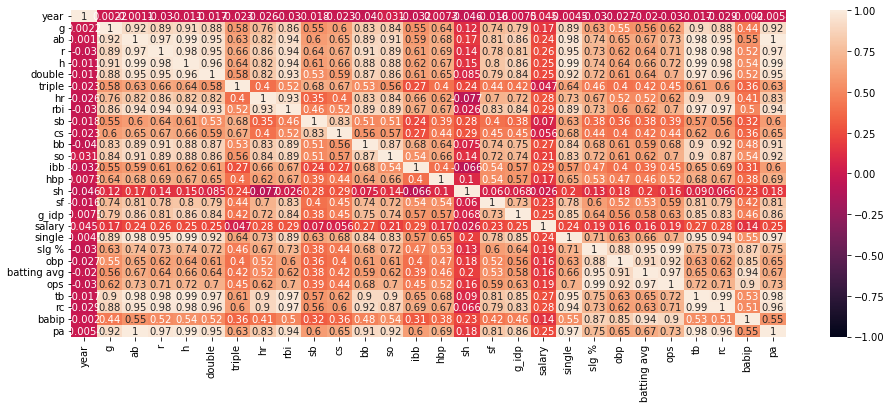

In [27]:
# Create heatmap to see correlation between columns
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(baseball_df.corr(),vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

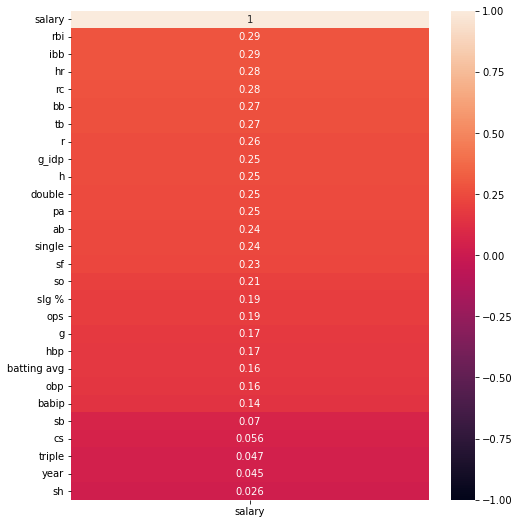

In [28]:
# Create heatmap to see correlation between salary column specifically.
plt.figure(figsize=(8, 9))
sns.heatmap(baseball_df.corr()[["salary"]].sort_values(by="salary", ascending=False), vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

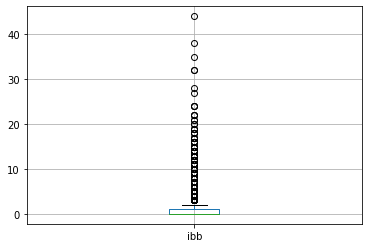

In [29]:
# Show outliers in ibb column
baseball_df.boxplot(column=["ibb"])

In [30]:
# Create team and salary only dataframe for correlation check.
team_salary_df = baseball_df[["team_id", "salary"]].copy()
team_salary_df

,team_id,salary
0,SEA,419000
1,LAA,5000000
2,SDN,414800
3,LAA,400000
4,SFN,3500000
...,...,...
4800,ARI,4500000
4801,WAS,7500000
4802,WAS,14000000
4803,TBA,7000000


In [31]:
# Use get dummies to create individual columns for team id
team_salary_df = pd.get_dummies(team_salary_df, columns=["team_id"], prefix="team")
team_salary_df

,salary,team_ARI,team_ATL,team_BAL,team_BOS,team_CHA,team_CHN,team_CIN,team_CLE,team_COL,team_DET,team_FLO,team_HOU,team_KCA,team_LAA,team_LAN,team_MIA,team_MIL,team_MIN,team_NYA,team_NYN,team_OAK,team_PHI,team_PIT,team_SDN,team_SEA,team_SFN,team_SLN,team_TBA,team_TEX,team_TOR,team_WAS
0,419000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,414800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,4500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4801,7500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4802,14000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4803,7000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

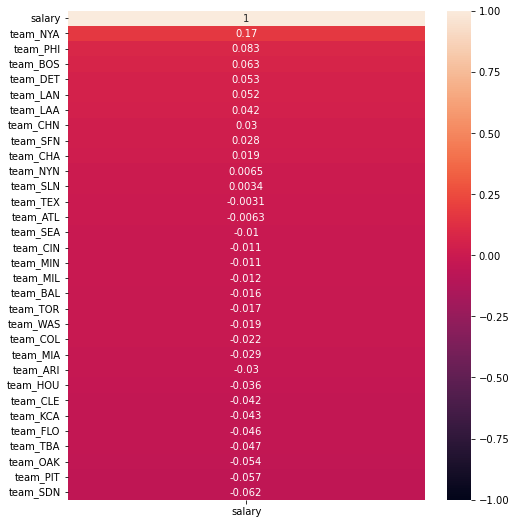

In [32]:
# Create heatmap to test correlation.
plt.figure(figsize=(8, 9))
sns.heatmap(team_salary_df.corr()[["salary"]].sort_values(by="salary", ascending=False), vmin=-1, vmax=1, annot=True)

In [33]:
# Based on this used get dummies on baseball_df for team_id
baseball_df = pd.get_dummies(baseball_df, columns=["team_id"], prefix="team")
baseball_df

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa,team_ARI,team_ATL,team_BAL,team_BOS,team_CHA,team_CHN,team_CIN,team_CLE,team_COL,team_DET,team_FLO,team_HOU,team_KCA,team_LAA,team_LAN,team_MIA,team_MIL,team_MIN,team_NYA,team_NYN,team_OAK,team_PHI,team_PIT,team_SDN,team_SEA,team_SFN,team_SLN,team_TBA,team_TEX,team_TOR,team_WAS
0,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4801,5,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4802,5,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4803,5,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
#removing salary data from the training set
X = baseball_df.drop(columns="salary").values
y = baseball_df["salary"].values
print("Shape: ", X.shape, y.shape)

Shape:  (4793, 58) (4793,)


In [35]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=.20)

In [36]:
import sklearn as skl
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
#import the model of our choosing
model = LinearRegression()

In [38]:
# Fit the model to the training data. 
model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test_scaled, y_test)

0.1863399502975399

In [40]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.21201566722387266
Testing Data Score: 0.1863399502975399


In [41]:
# Do feature regression to find most correlated features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 8.316661
Feature 1: 137.415448
Feature 2: 252.224557
Feature 3: 287.348964
Feature 4: 271.450648
Feature 5: 257.049187
Feature 6: 10.150272
Feature 7: 363.601624
Feature 8: 376.263387
Feature 9: 21.720510
Feature 10: 15.664056
Feature 11: 321.494517
Feature 12: 195.703339
Feature 13: 334.583990
Feature 14: 122.201475
Feature 15: 1.807307
Feature 16: 233.632598
Feature 17: 265.954746
Feature 18: 233.909411
Feature 19: 156.362382
Feature 20: 115.397110
Feature 21: 110.728493
Feature 22: 150.806230
Feature 23: 308.103032
Feature 24: 344.686362
Feature 25: 83.706853
Feature 26: 263.847308
Feature 27: 2.066742
Feature 28: 0.058432
Feature 29: 0.096570
Feature 30: 16.632918
Feature 31: 1.130970
Feature 32: 3.313485
Feature 33: 0.001906
Feature 34: 6.110805
Feature 35: 1.731033
Feature 36: 10.784331
Feature 37: 6.138403
Feature 38: 8.146783
Feature 39: 6.214528
Feature 40: 6.700399
Feature 41: 12.380937
Feature 42: 3.279727
Feature 43: 1.760046
Feature 44: 2.515216
Feature 45: 125.

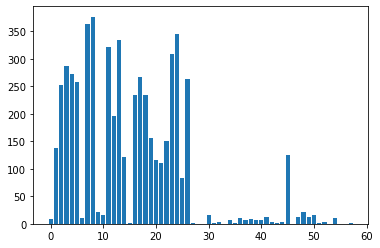

In [42]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [43]:
baseball_df_wo_salary = baseball_df.drop(columns="salary")

In [44]:
# Get sorted list of features by column name and correlation.
sorted(zip(fs.scores_, baseball_df_wo_salary.columns), reverse=True)

[(376.26338718859876, 'rbi'),
 (363.60162405814344, 'hr'),
 (344.68636201088447, 'rc'),
 (334.5839898799853, 'ibb'),
 (321.4945166020048, 'bb'),
 (308.1030322410622, 'tb'),
 (287.34896370033954, 'r'),
 (271.4506484602504, 'h'),
 (265.95474550680007, 'g_idp'),
 (263.8473077021481, 'pa'),
 (257.049187279225, 'double'),
 (252.22455704555802, 'ab'),
 (233.90941056078745, 'single'),
 (233.63259798147863, 'sf'),
 (195.70333939769694, 'so'),
 (156.3623818583129, 'slg %'),
 (150.80623007000497, 'ops'),
 (137.41544827517296, 'g'),
 (125.04226067393057, 'team_NYA'),
 (122.20147510917563, 'hbp'),
 (115.39711005958752, 'obp'),
 (110.72849257482478, 'batting avg'),
 (83.70685309529576, 'babip'),
 (21.72050953779496, 'sb'),
 (20.930075099234585, 'team_PHI'),
 (16.63291777542893, 'team_BOS'),
 (15.801675281631548, 'team_SDN'),
 (15.664056265003714, 'cs'),
 (12.894455170407495, 'team_PIT'),
 (12.38093683075004, 'team_LAN'),
 (11.872218235067507, 'team_OAK'),
 (10.784331239547617, 'team_DET'),
 (10.150